## Day 20

## PLOT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json('Dataset/iris.json')
df

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Barplot

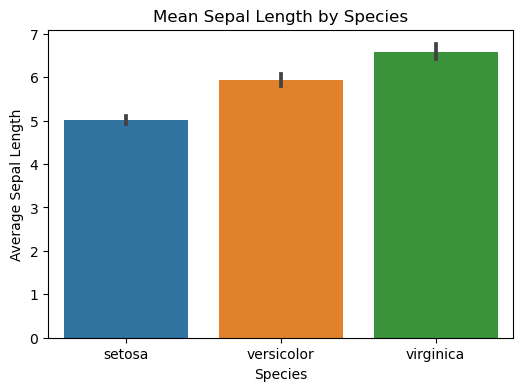

In [4]:
plt.figure(figsize=(6,4))
sns.barplot(x='species',y='sepalLength',data=df,estimator=np.mean)
plt.title("Mean Sepal Length by Species")
plt.xlabel("Species")
plt.ylabel("Average Sepal Length")
plt.show()

#### Categorial variable: "species"
### count plot

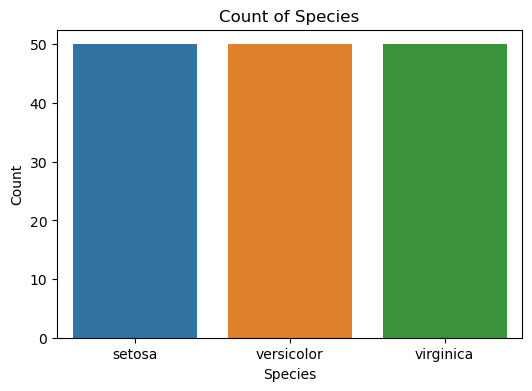

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='species',data=df)
plt.title("Count of Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

### Pie Chart

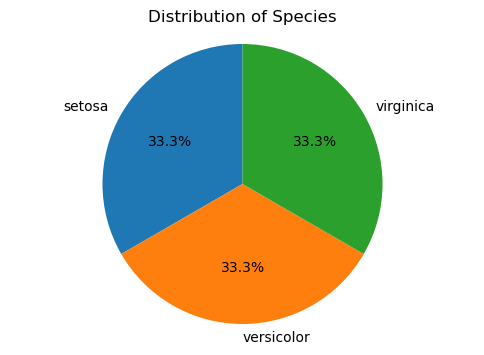

In [13]:
#count the number of each species
sepcies_count = df['species'].value_counts()

#plot the pie chart
plt.figure(figsize=(6,4))
plt.pie(sepcies_count,labels=sepcies_count.index,autopct='%1.1f%%',startangle=90)
plt.title("Distribution of Species")
#equal aspect ratio makes the pie chart circular
plt.axis('equal')
plt.show()

Numerical value (Univariate)
- histogram
- density plot
- box plot

### Histogram

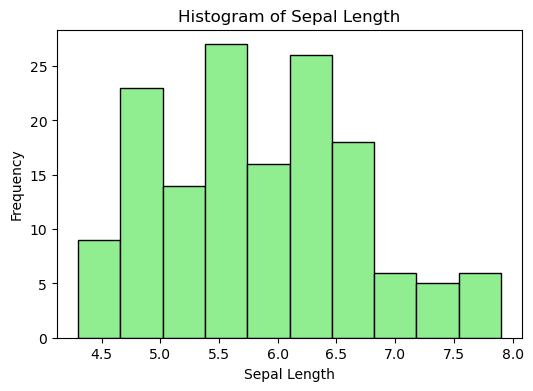

In [ ]:
#Histogram of sepal length
plt.figure(figsize=(6,4))
plt.hist(df['sepalLength'],bins=10,color='lightgreen',edgecolor='black')
plt.title("Histogram of Sepal Length")
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.show()

### Density plot

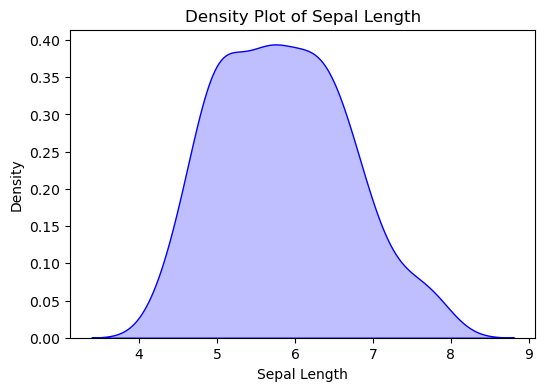

In [21]:
plt.figure(figsize=(6,4))
sns.kdeplot(df['sepalLength'],fill = True,color ="blue")
plt.title("Density Plot of Sepal Length")
plt.xlabel("Sepal Length")
plt.ylabel("Density")
plt.show()

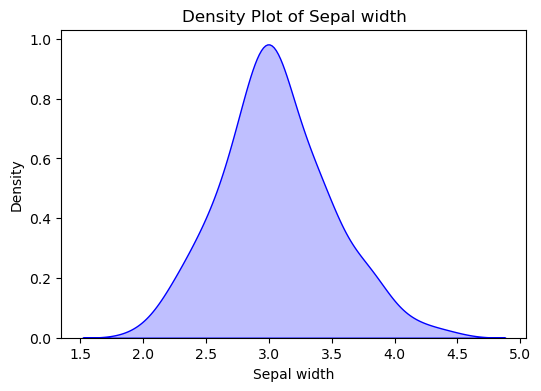

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(df['sepalWidth'],fill = True,color ="blue")
plt.title("Density Plot of Sepal width")
plt.xlabel("Sepal Width")
plt.ylabel("Density")
plt.show()

### Box Plot

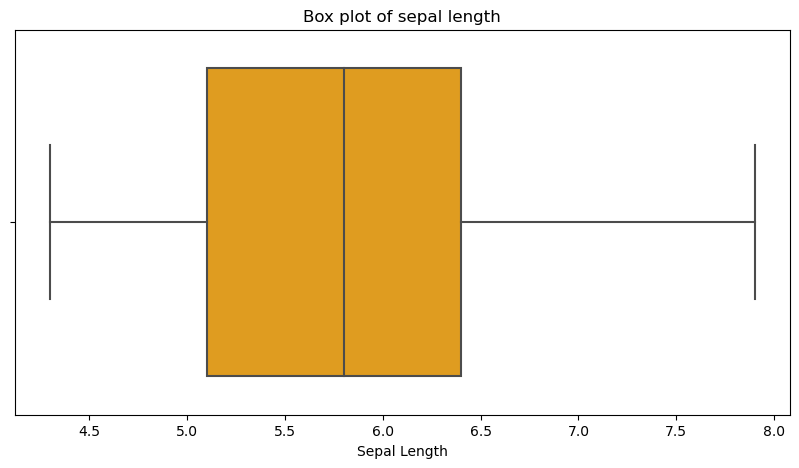

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['sepalLength'],color="orange")
plt.title("Box plot of sepal length")
plt.xlabel("Sepal Length")
plt.show()

Bivariate plot
- Scatter plot
- Line plot
- Bar plot

### Scatter plot

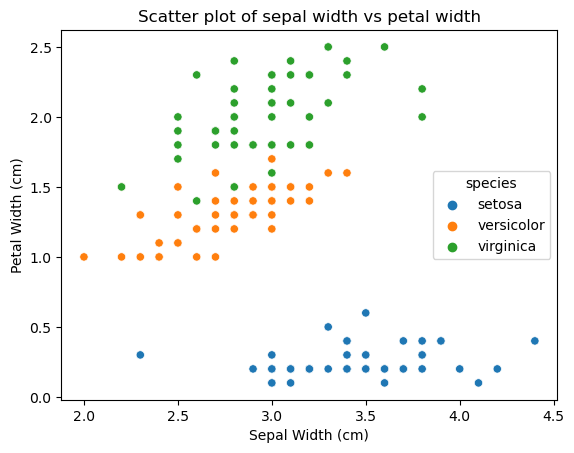

In [36]:
# scatter plot ofsepal width Vs Petal width
sns.scatterplot(x="sepalWidth", y="petalWidth", data=df, hue="species")
plt.title("Scatter plot of sepal width vs petal width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title = "species",loc="center right")
plt.show()

### Line plot

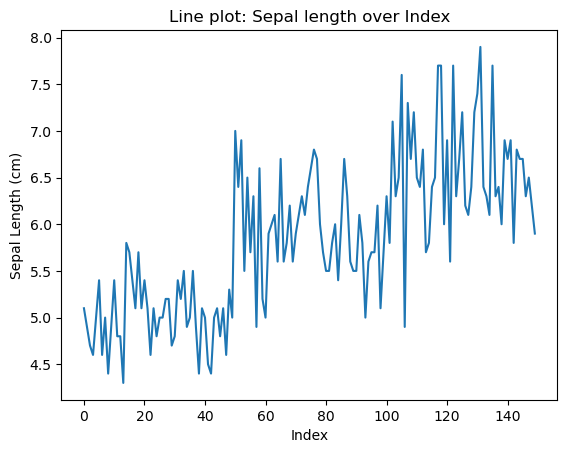

In [38]:
#line plot sepal length over index
sns.lineplot(x=df.index,y ='sepalLength',data =df)
plt.title("Line plot: Sepal length over Index")
plt.xlabel("Index")
plt.ylabel("Sepal Length (cm)")
plt.show()

### Bar plot 

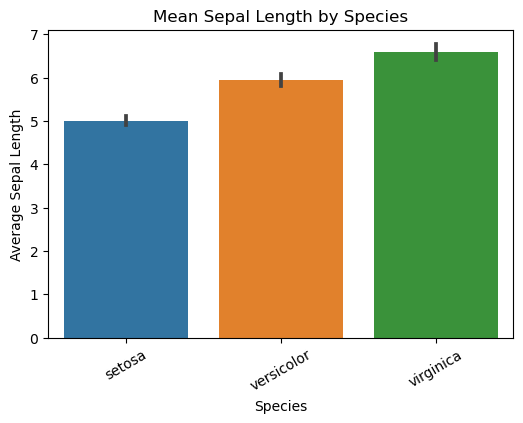

In [43]:
#bar plot of sepal length by species
plt.figure(figsize=(6,4))
sns.barplot(x='species',y='sepalLength',data=df,estimator=np.mean)
plt.title("Mean Sepal Length by Species")
plt.xlabel("Species")
plt.xticks(rotation=30)
plt.ylabel("Average Sepal Length")
plt.show()

### Box plot

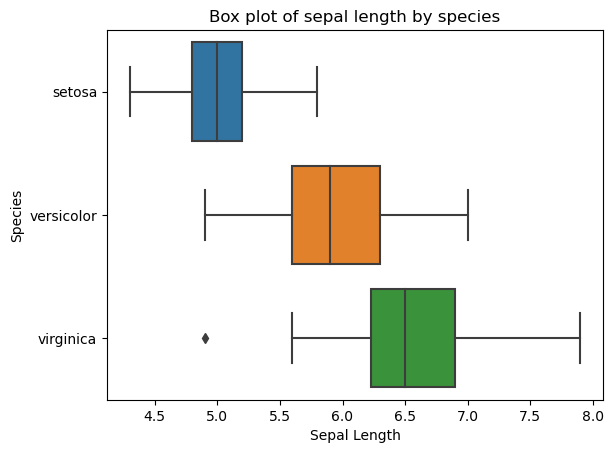

In [47]:
#Box plot of sepal length by species
sns.boxplot(x='sepalLength',y='species',data=df)
plt.title("Box plot of sepal length by species")
plt.xlabel("Sepal Length")
plt.ylabel("Species")
plt.show()

### Violin Plot

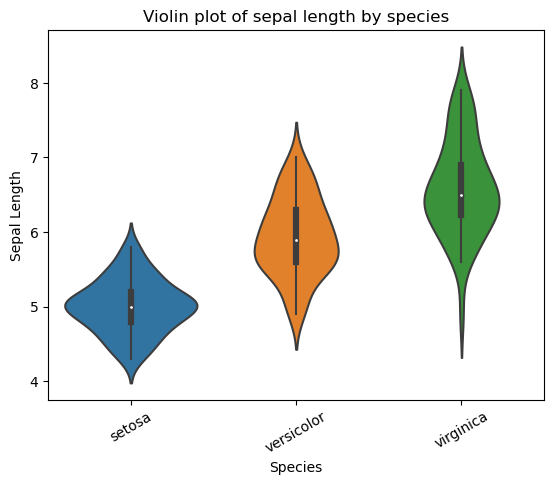

In [52]:
#Violin plot of sepal length by species
sns.violinplot(x='species',y='sepalLength',data=df)
plt.title("Violin plot of sepal length by species")
plt.ylabel("Sepal Length")
plt.xlabel("Species")
plt.xticks(rotation=30)
plt.show()

### Swarm plot

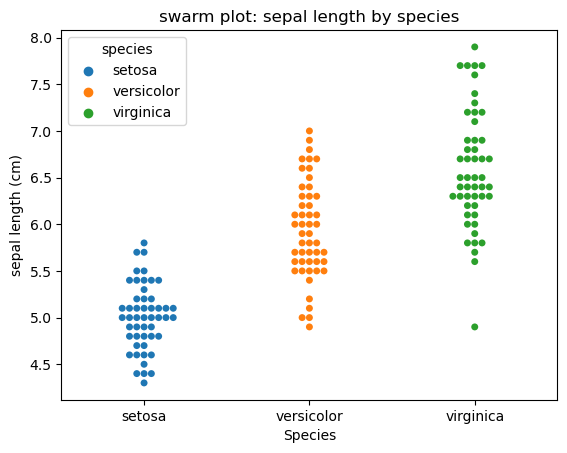

In [54]:
#swarm plot of sepal length for each species

sns.swarmplot(x="species",y='sepalLength',data= df,hue = "species")
plt.title("swarm plot: sepal length by species")
plt.xlabel("Species")
plt.ylabel("sepal length (cm)")
plt.show()

### scatter plot

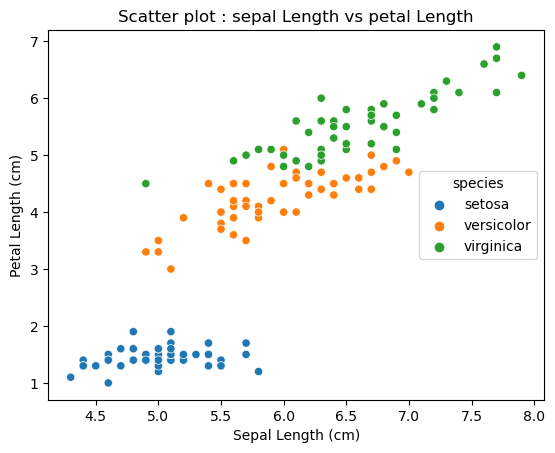

In [58]:
# scatter plot : sepal Length vs petal Length
sns.scatterplot(x="sepalLength", y="petalLength", data=df, hue="species")
plt.title("Scatter plot : sepal Length vs petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title = "species",loc="center right")
plt.show()

### 2D Histogram

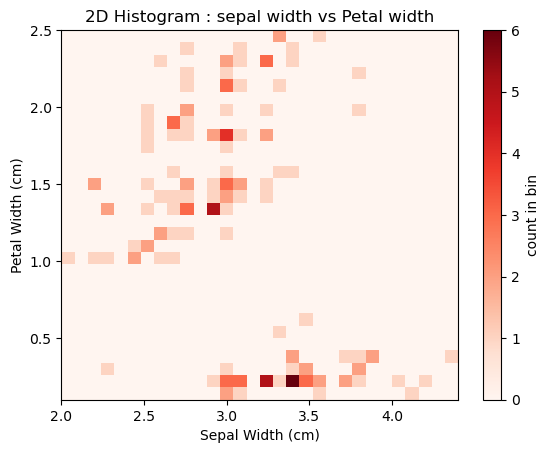

In [68]:
plt.hist2d(df['sepalWidth'],df['petalWidth'],bins=30,cmap ="Reds")
plt.colorbar(label = "count in bin")
plt.title("2D Histogram : sepal width vs Petal width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

### Line plot of petal width for each species over sample index

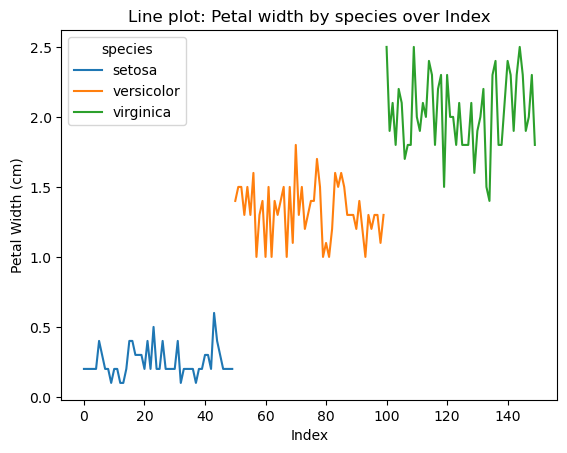

In [70]:
sns.lineplot(x=df.index, y="petalWidth", data=df, hue="species")
plt.title("Line plot: Petal width by species over Index")
plt.xlabel("Index")
plt.ylabel("Petal Width (cm)")
plt.show()

Categorical Vs Categorical
- contingency table

# Add a new categorical column with 3 flower types
def assign_flower_type(species):
    if species == 'setosa':
        return 'Type-A'
    elif species == 'versicolor':
        return 'Type-B'
    else:
        return 'Type-C'

df['flower_type'] = df['species'].apply(assign_flower_type)
df



In [74]:
#contingency table
contingency_table = pd.crosstab(df['species'],df['flower_type'])
contingency_table

flower_type,Type-A,Type-B,Type-C
species,,,
setosa,50,0,0
versicolor,0,50,0
virginica,0,0,50


### Multivariate plot
- scatter matrix plot
- correlation matrix plot
- pair plot
- 3D plot

In [77]:
#compute correlation matix
corr = df[['sepalLength','sepalWidth','petalLength','petalWidth']].corr()
corr
# 1- strong positive correlation
# -1- strong negative correlation
# 0 - No retaionship

,sepalLength,sepalWidth,petalLength,petalWidth
sepalLength,1.000000,-0.117570,0.871754,0.817941
sepalWidth,-0.117570,1.000000,-0.428440,-0.366126
petalLength,0.871754,-0.428440,1.000000,0.962865
petalWidth,0.817941,-0.366126,0.962865,1.000000


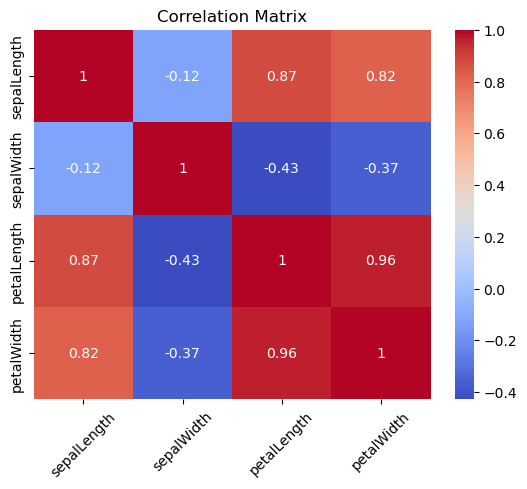

In [79]:
#plot Heatmap
sns.heatmap(corr,annot= True,cmap ="coolwarm")
plt.title("Correlation Matrix")
plt.xticks(rotation=45)
plt.show()

### Scatter Matrix plot

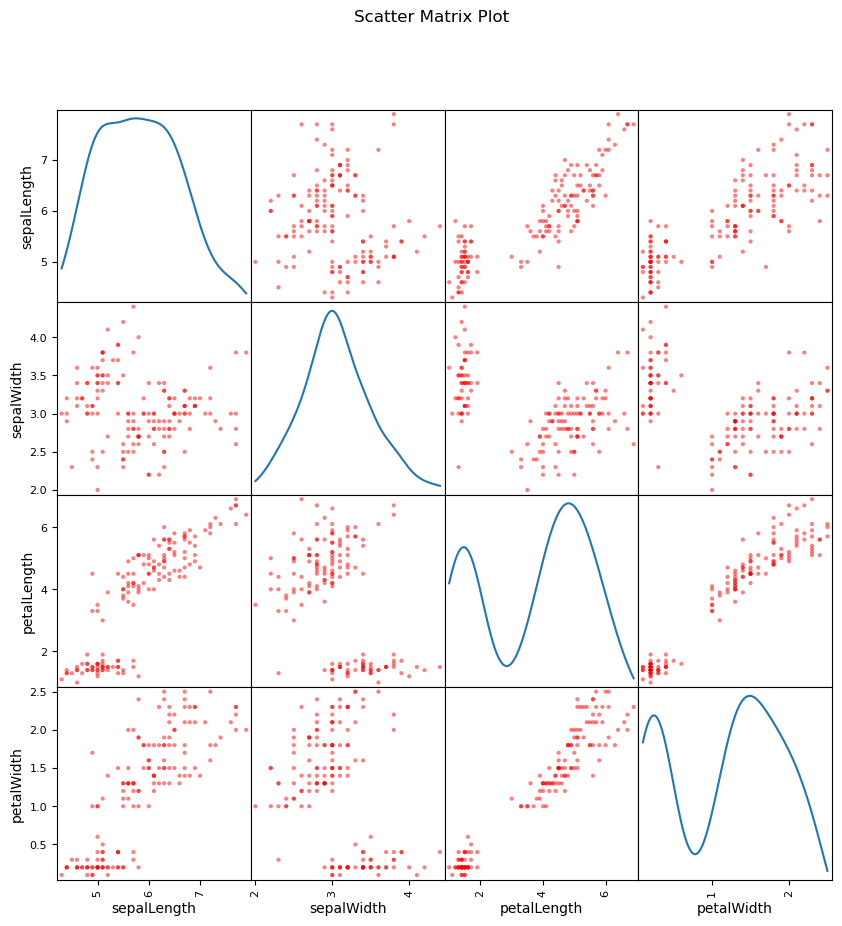

In [89]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[['sepalLength','sepalWidth','petalLength','petalWidth']],figsize=(10,10),diagonal = 'kde',color ='red')
plt.suptitle("Scatter Matrix Plot")
plt.show()